In [ ]:
!pip install numpy==1.23.5
!pip install opencv-python
!pip install matplotlib

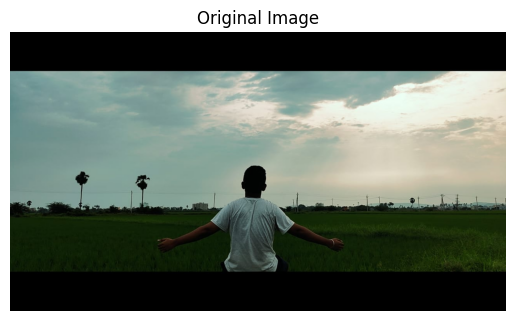

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read Image
img = cv2.imread('mine.jpg')  # Upload sample image in Colab

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load the image. Make sure 'sample.jpg' is uploaded.")
else:
    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Save the image after resize
    resized = cv2.resize(img, (400, 400))
    cv2.imwrite('resized_sample.jpg', resized)

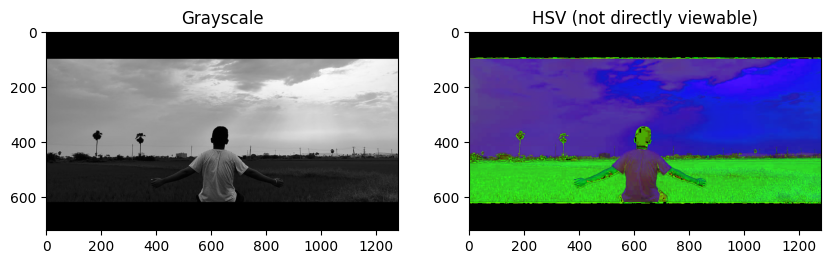

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")

plt.subplot(1,2,2)
plt.imshow(hsv)
plt.title("HSV (not directly viewable)")

plt.show()

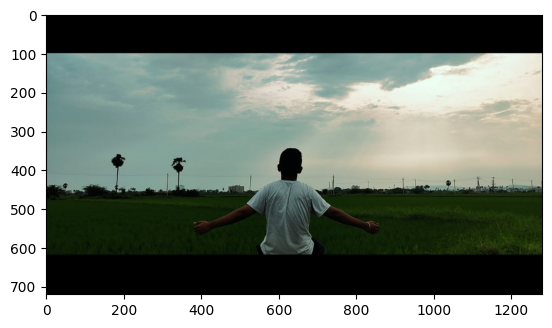

In [ ]:
img_NZ_bgr = cv2.imread("mine.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

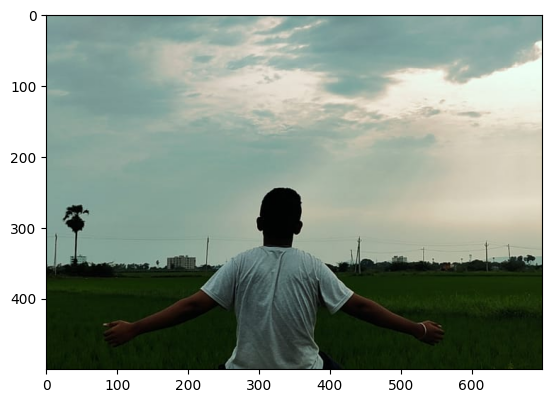

In [ ]:
cropped_region = img_NZ_rgb[100:600, 300:1000]
plt.imshow(cropped_region)

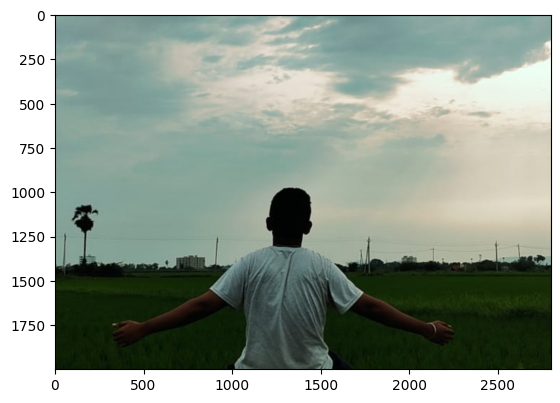

In [ ]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=4, fy=4)
plt.imshow(resized_cropped_region_2x)

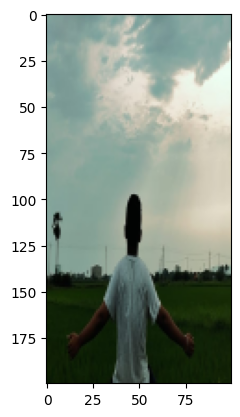

In [ ]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

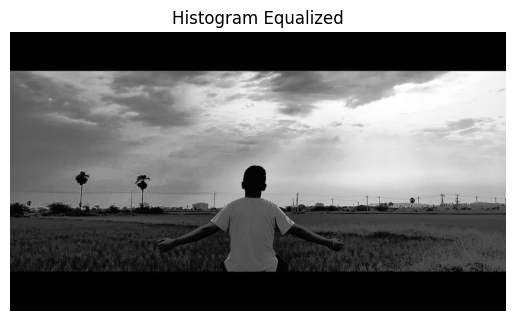

In [ ]:
hist_eq = cv2.equalizeHist(gray)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()

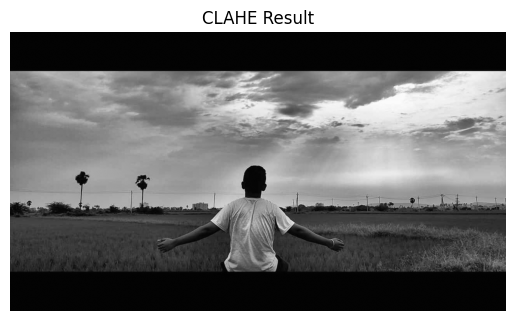

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_eq = clahe.apply(gray)
plt.imshow(clahe_eq, cmap='gray')
plt.title("CLAHE Result")
plt.axis("off")
plt.show()

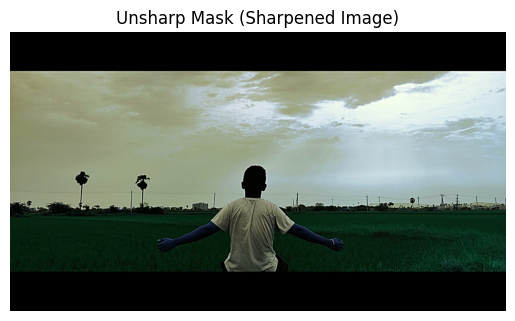

In [ ]:
gaussian_blur = cv2.GaussianBlur(img, (9, 9), 10.0)
unsharp_image = cv2.addWeighted(img, 1.5, gaussian_blur, -0.5, 0)

plt.imshow(unsharp_image)
plt.title("Unsharp Mask (Sharpened Image)")
plt.axis("off")
plt.show()

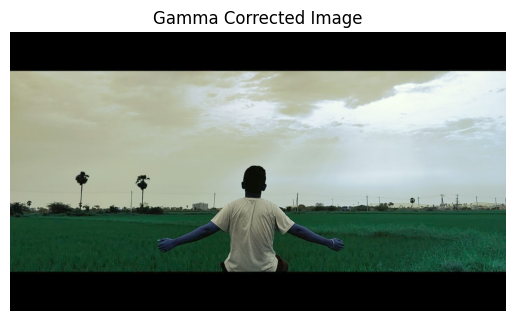

In [ ]:
gamma = 1.5
invGamma = 1.0 / gamma
table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
gamma_corrected = cv2.LUT(img, table)

plt.imshow(gamma_corrected)
plt.title("Gamma Corrected Image")
plt.axis("off")
plt.show()

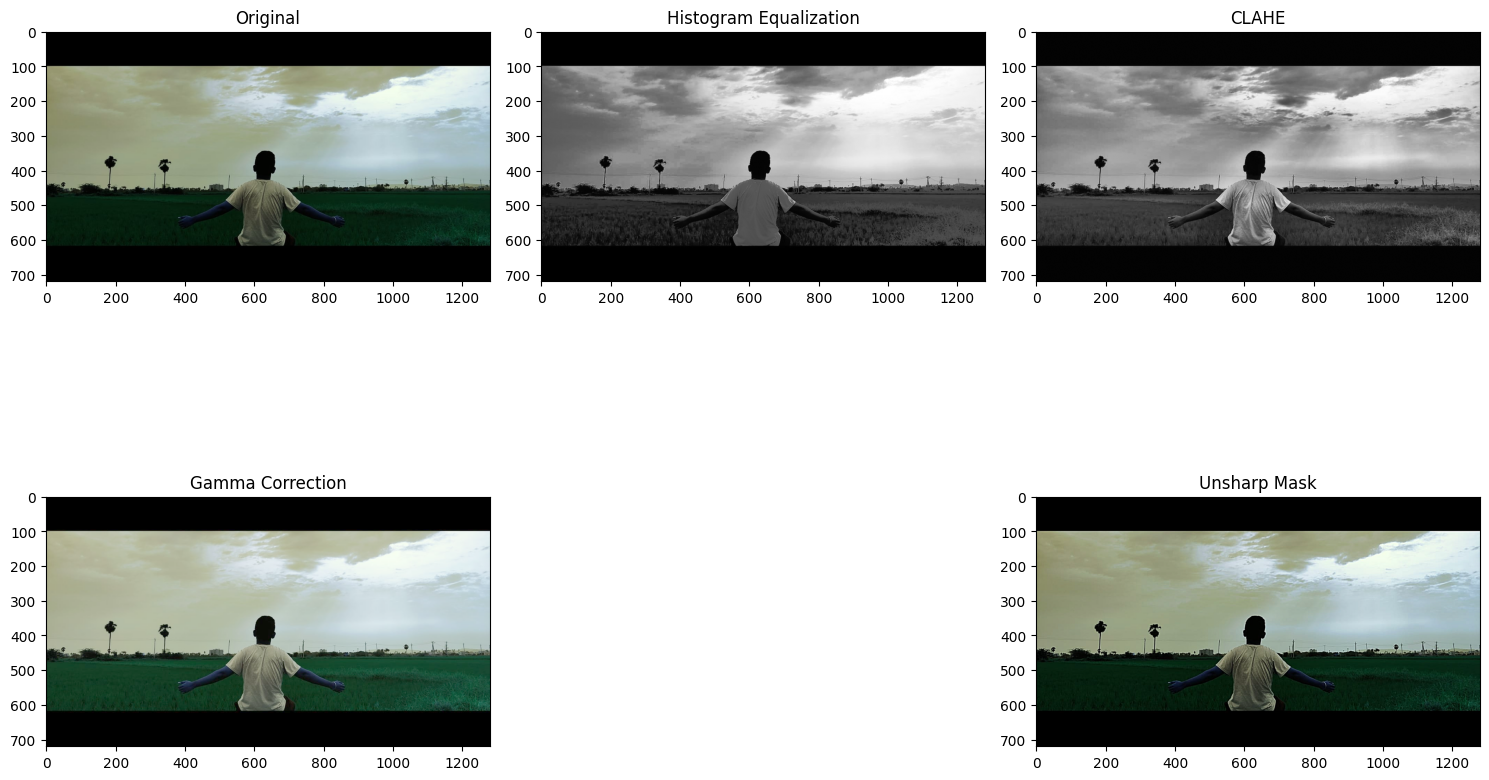

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Original")

plt.subplot(2,3,2)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalization")

plt.subplot(2,3,3)
plt.imshow(clahe_eq, cmap='gray')
plt.title("CLAHE")

plt.subplot(2,3,4)
plt.imshow(gamma_corrected)
plt.title("Gamma Correction")


plt.subplot(2,3,6)
plt.imshow(unsharp_image)
plt.title("Unsharp Mask")

plt.tight_layout()
plt.show()

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload both base image and template image
uploaded = files.upload()

Saving mine.jpg to mine (1).jpg


In [52]:
# Cell 1: Install OpenCV
print("Ensuring OpenCV is installed...")
# opencv-python provides the core OpenCV library
!pip install opencv-python matplotlib Pillow

print("\nInstallation/check complete. Proceed to next cell.")

Ensuring OpenCV is installed...

Installation/check complete. Proceed to next cell.


In [58]:
# Cell 2: Import Libraries, Download Haar Cascade, and Load Image

import cv2 # OpenCV library
import matplotlib.pyplot as plt
from PIL import Image # For displaying with matplotlib.pyplot
import numpy as np
import time
from google.colab import files # For image upload
import os

print("Importing libraries and preparing...")

# --- Download Haar Cascade XML file ---
# This file contains the pre-trained model for face detection.
haar_cascade_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
haar_cascade_filename = 'haarcascade_frontalface_default.xml'

print(f"Downloading Haar Cascade file: {haar_cascade_filename}...")
if not os.path.exists(haar_cascade_filename):
    !wget {haar_cascade_url} -O {haar_cascade_filename}
    print("Download complete.")
else:
    print("Haar Cascade file already exists.")


# --- Upload your image ---
print("\nUploading your image...")
uploaded = files.upload()

# Get the name of the uploaded file (assuming only one file is uploaded)
image_filename = next(iter(uploaded))

# --- Load the image ---
# OpenCV reads images as BGR by default, and as a NumPy array
img_bgr = cv2.imread(image_filename)

# Cell 2: Import Libraries, Download Haar Cascade, and Load Image

import cv2 # OpenCV library
import matplotlib.pyplot as plt
from PIL import Image # For displaying with matplotlib.pyplot
import numpy as np
import time
from google.colab import files # For image upload
import os

print("Importing libraries and preparing...")

# --- Download Haar Cascade XML file ---
# This file contains the pre-trained model for face detection.
haar_cascade_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
haar_cascade_filename = 'haarcascade_frontalface_default.xml'

print(f"Downloading Haar Cascade file: {haar_cascade_filename}...")
if not os.path.exists(haar_cascade_filename):
    !wget {haar_cascade_url} -O {haar_cascade_filename}
    print("Download complete.")
else:
    print("Haar Cascade file already exists.")


# --- Upload your image ---
print("\nUploading your image...")
uploaded = files.upload()

# Get the name of the uploaded file (assuming only one file is uploaded)
image_filename = next(iter(uploaded))

# --- Load the image ---
# OpenCV reads images as BGR by default, and as a NumPy array
img_bgr = cv2.imread(image_filename)

if img_bgr is None:
    print(f"Error: Could not load image from {image_filename}. Check file path.")
else:
    # Convert BGR to RGB for matplotlib display (matplotlib expects RGB)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Get image dimensions for matplotlib figure size
    height, width, _ = img_rgb.shape # OpenCV image (NumPy array) gives (height, width, channels)
    fig_width = 15 # Set a base width for the figure
    fig_height = fig_width * (height / width) # Adjust height proportionally

    print(f"Image '{image_filename}' loaded. Dimensions: {width}x{height}")

Importing libraries and preparing...
Haar Cascade file already exists.

Uploading your image...


Saving First Look - Desktop jpg.jpg to First Look - Desktop jpg (2).jpg
Importing libraries and preparing...
Haar Cascade file already exists.

Uploading your image...


Saving wp7473576.webp to wp7473576 (1).webp
Image 'wp7473576 (1).webp' loaded. Dimensions: 5120x2880



Detecting faces using Haar Cascade Classifier...

--- Detected Faces ---
  Face found at X: 2916, Y: 1450, Width: 63, Height: 63


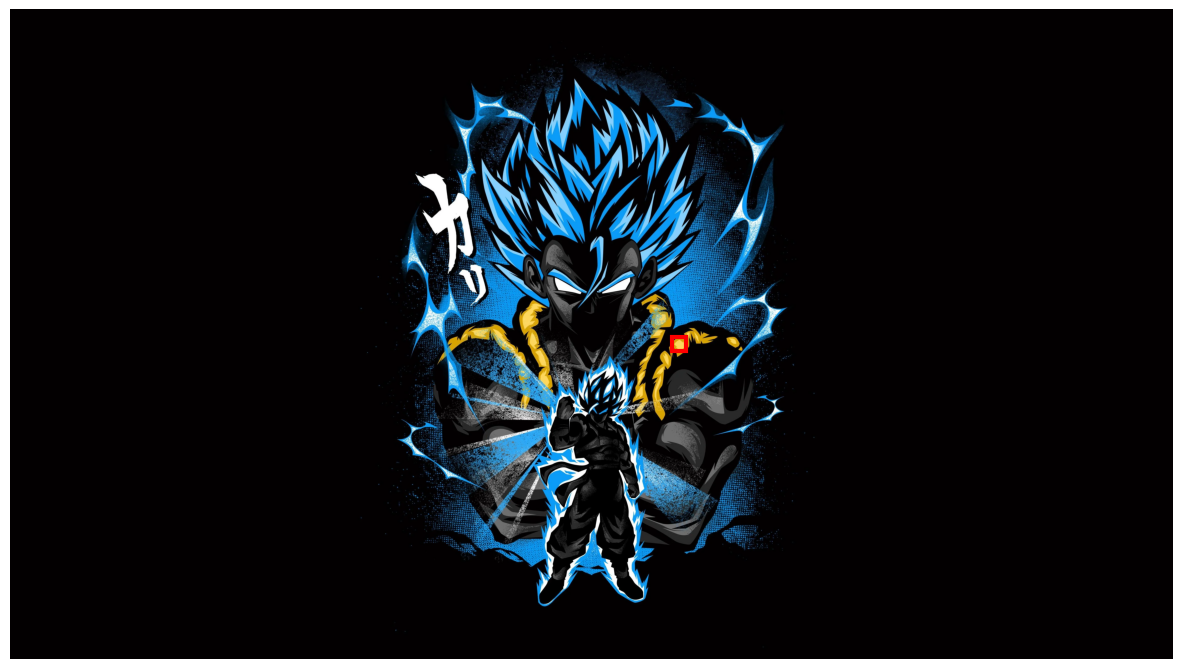


--- Detection Summary ---
Number of faces detected: 1
Time taken for detection: 4.21  seconds


In [59]:
# Cell 3: Perform Face Detection and Plot Results (using OpenCV)

print("\nDetecting faces using Haar Cascade Classifier...")

# Load the Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(haar_cascade_filename)

# Convert the image to grayscale, which is required for Haar Cascades
gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

start = time.time()
# Perform face detection
# detectMultiScale parameters:
# 1.3: scaleFactor - how much the image size is reduced at each image scale
# 5: minNeighbors - how many neighbors each candidate rectangle should have to retain it
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
end = time.time()

# Create the plot
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.imshow(img_rgb, aspect='auto') # Display the RGB image

print("\n--- Detected Faces ---")
# Draw rectangles around the faces
for (x, y, w, h) in faces:
    # x, y are the top-left corner; w, h are width and height
    print(f"  Face found at X: {x}, Y: {y}, Width: {w}, Height: {h}")

    # Create a Rectangle patch (matplotlib expects left, bottom, width, height for patches)
    # However, for images, it's (left, top), width, height
    rect = plt.Rectangle((x, y), w, h, linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Hide axes ticks and labels for a cleaner image
ax.set_axis_off()
plt.show() # Display the plot

print("\n--- Detection Summary ---")
print("Number of faces detected:", len(faces))
print("Time taken for detection:", round(end - start,2)," seconds")